In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from itertools import combinations

In [6]:
df1 = pd.read_pickle("./ds1.pkl")
df2 = pd.read_pickle("./ds2.pkl")

# Data Cleaning

In [7]:
df1.isnull().any()

state                     False
account length            False
area code                 False
international plan        False
voice mail plan           False
number vmail messages     False
total day minutes         False
total day calls           False
total day charge          False
total eve minutes         False
total eve calls           False
total eve charge          False
total night minutes       False
total night calls         False
total night charge        False
total intl minutes        False
total intl calls          False
total intl charge         False
customer service calls    False
churn                     False
dtype: bool

In [8]:
df2.isnull().any()

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [9]:
print("No of duplicate data-entries in 1st dataset = "+ str(len(df1[df1.duplicated(keep=False)])))
print("No of duplicate data-entries in 2nd dataset = "+ str(len(df2[df2.duplicated(keep=False)])/2))

No of duplicate data-entries in 1st dataset = 0
No of duplicate data-entries in 2nd dataset = 21.0


There is need to remove duplicate rows from the second dataset

In [10]:
x1 = len(df2)
df2 = df2.drop_duplicates(subset=None, keep='first', inplace=False)
print("No of duplicate data-entries in 2nd dataset = "+ str(len(df2[df2.duplicated(keep=False)])))
x2 = len(df2)
print(str(x1)+" - > "+str(x2))

No of duplicate data-entries in 2nd dataset = 0
7043 - > 7021


it appers that there was a triplicate entry in the second dataset apart from duplicates

### The datasets are now are free of nulls and duplicates

In [11]:
df2.to_pickle("./ds2.pkl")
df2 = pd.read_pickle("./ds2.pkl")

# Data Transformation

In [12]:
df1

state  account length  area code international plan  \
phone number                                                       
382-4657        KS             128        415                 no   
371-7191        OH             107        415                 no   
358-1921        NJ             137        415                 no   
375-9999        OH              84        408                yes   
330-6626        OK              75        415                yes   
391-8027        AL             118        510                yes   
355-9993        MA             121        510                 no   
329-9001        MO             147        415                yes   
335-4719        LA             117        408                 no   
330-8173        WV             141        415                yes   
329-6603        IN              65        415                 no   
344-9403        RI              74        415                 no   
363-1107        IA             168        408                 no   
394-8006        MT              95        510                 no   
366-9238        IA              62        415                 no   
351-7269        NY             161        415                 no   
350-8884        ID              85        408                 no   
386-2923        VT              93        510                 no   
356-2992        VA              76        510                 no   
373-2782        TX              73        415                 no   
396-5800        FL             147        415                 no   
393-7984        CO              77        408                 no   
358-1958        AZ             130        415                 no   
350-2565        SC             111        415                 no   
343-4696        VA             132        510                 no   
331-3698        NE             174        415                 no   
357-3817        WY              57        408                 no   
418-6412        MT              54        408                 no   
353-2630        MO              20        415                 no   
410-7789        HI              49        510                 no   
...            ...             ...        ...                ...   
373-7308        WI             114        415                 no   
330-7137        IL              71        510                yes   
406-8445        IN              58        415                 no   
404-5283        AL             106        408                 no   
398-3632        OK             172        408                 no   
399-5763        IA              45        415                 no   
340-9449        VT             100        408                yes   
363-1123        NY              94        415                 no   
361-2170        LA             128        415                 no   
406-6304        SC             181        408                 no   
392-5090        ID             127        408                 no   
373-7713        MO              89        415                 no   
392-1376        ME             149        415                 no   
390-6388        MS             103        510                 no   
379-7290        SD             163        415                yes   
397-9928        OK              52        415                 no   
378-6924        WY              89        415                 no   
411-5677        GA             122        510                yes   
400-2738        VT              60        415                 no   
409-1856        MD              62        408                 no   
362-5899        IN             117        415                 no   
377-1164        WV             159        415                 no   
368-8555        OH              78        408                 no   
347-6812        OH              96        415                 no   
348-3830        SC              79        415                 no   
414-4276        AZ             192        415                 no   
3

In [13]:
df2

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
customerID                                                                  
7590-VHVEG  Female              0     Yes         No       1           No   
5575-GNVDE    Male              0      No         No      34          Yes   
3668-QPYBK    Male              0      No         No       2          Yes   
7795-CFOCW    Male              0      No         No      45           No   
9237-HQITU  Female              0      No         No       2          Yes   
9305-CDSKC  Female              0      No         No       8          Yes   
1452-KIOVK    Male              0      No        Yes      22          Yes   
6713-OKOMC  Female              0      No         No      10           No   
7892-POOKP  Female              0     Yes         No      28          Yes   
6388-TABGU    Male              0      No        Yes      62          Yes   
9763-GRSKD    Male              0     Yes        Yes      13          Yes   
7469-LKBCI    Male              0      No         No      16          Yes   
8091-TTVAX    Male              0     Yes         No      58          Yes   
0280-XJGEX    Male              0      No         No      49          Yes   
5129-JLPIS    Male              0      No         No      25          Yes   
3655-SNQYZ  Female              0     Yes        Yes      69          Yes   
8191-XWSZG  Female              0      No         No      52          Yes   
9959-WOFKT    Male              0      No        Yes      71          Yes   
4190-MFLUW  Female              0     Yes        Yes      10          Yes   
4183-MYFRB  Female              0      No         No      21          Yes   
8779-QRDMV    Male              1      No         No       1           No   
1680-VDCWW    Male              0     Yes         No      12          Yes   
1066-JKSGK    Male              0      No         No       1          Yes   
3638-WEABW  Female              0     Yes         No      58          Yes   
6322-HRPFA    Male              0     Yes        Yes      49          Yes   
6865-JZNKO  Female              0      No         No      30          Yes   
6467-CHFZW    Male              0     Yes        Yes      47          Yes   
8665-UTDHZ    Male              0     Yes        Yes       1           No   
5248-YGIJN    Male              0     Yes         No      72          Yes   
8773-HHUOZ  Female              0      No        Yes      17          Yes   
...            ...            ...     ...        ...     ...          ...   
1685-BQULA  Female              0      No         No      40          Yes   
9053-EJUNL    Male              0      No         No      41          Yes   
0666-UXTJO    Male              1     Yes         No      34          Yes   
1471-GIQKQ  Female              0      No         No       1          Yes   
4807-IZYOZ  Female              0      No         No      51          Yes   
1122-JWTJW    Male              0     Yes        Yes       1          Yes   
9710-NJERN  Female              0      No         No      39          Yes   
9837-FWLCH    Male              0     Yes        Yes      12          Yes   
1699-HPSBG    Male              0      No         No      12          Yes   
7203-OYKCT    Male              0      No         No      72          Yes   
1035-IPQPU  Female              1     Yes         No      63          Yes   
7398-LXGYX    Male              0     Yes         No      44          Yes   
2823-LKABH  Female              0      No         No      18          Yes   
8775-CEBBJ  Female              0      No         No       9          Yes   
0550-DCXLH    Male              0      No         No      13          Yes   
9281-CEDRU  Female              0     Yes         No      68          Yes   
2235-DWLJU  Female              1      No         No       6           No   
0871-OPBXW  Female              0      No         No       2          Yes   
3605-JISKB    Male              1     Yes         No      55          Yes   
6894-LFH

#### So df1 - state **||** df2 - gender, MultipleLines, InternetService, Contract, PaymentMethod needs to be transformed

In [16]:
from collections import Counter
from itertools import combinations 

states = list(df1.state.unique())
code_states = [i*2 for i in range(len(states))]
print(states)
print(code_states)

area_code_set  = Counter(list(df1['area code']))
area_code_uniq = list(area_code_set.keys())
area_code_freq = list(area_code_set.values())

print(area_code_uniq)
print(area_code_freq)

['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI', 'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC', 'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR', 'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC', 'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND']
[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100]
[415, 408, 510]
[1655, 838, 840]


In [18]:
gender   = list(df2.gender.unique())         #sh
lines    = list(df2.MultipleLines.unique())
internet = list(df2.InternetService.unique())
contract = list(df2.Contract.unique())
payment  = list(df2.PaymentMethod.unique())
print(gender)
print(lines)
print(internet)
print(contract)
print(payment)

['Female', 'Male']
['No phone service', 'No', 'Yes']
['DSL', 'Fiber optic', 'No']
['Month-to-month', 'One year', 'Two year']
['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)']


In [19]:
code_gender   = [0, 1]         #no gender discrimination here!!!
code_lines    = [-10, 0, 10]   #no sevice is worse than no multiple lines i.e. atleast one line
code_internet = [1, 10, 0]     #fiber optic is typically 100x faster than DSL
code_contract = [1, 12, 24]    #longer the contract more the value
code_payment  = [6, 4, 8, 10] #automatic payment better and credit card even better, mailed check is the slowest

In [20]:
df1.state = df1.state.replace(to_replace=states, value=code_states)

df2.gender          = df2.gender.replace(to_replace=gender, value=code_gender)
df2.MultipleLines   = df2.MultipleLines.replace(to_replace=lines, value=code_lines)
df2.InternetService = df2.InternetService.replace(to_replace=internet, value=code_internet)
df2.Contract        = df2.Contract.replace(to_replace=contract, value=code_contract)
df2.PaymentMethod   = df2.PaymentMethod.replace(to_replace=payment, value=code_payment)

In [21]:
df1.churn = df1.churn.astype(str)
#extra statement as the last column churn in df2 is of type bool
def replace_strings(df):
    col_types = df.dtypes
    col_names = col_types.keys()
    for i in range(len(col_types)):
        if col_types[i] == 'object':
            col = col_names[i]
            df[col] = df[col].replace(to_replace=['no','yes','No','Yes','false','true','False','True', 'No internet service'], 
                                      value=[0,1,0,1,0,1,0,1,-1])
    return df
df1 = replace_strings(df1)
df2 = replace_strings(df2)

### The following correction as it popped out in later stages

In [22]:
df2 = df2.convert_objects(convert_numeric=True)

F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [23]:
df2.isnull().any()

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

A null value has popped in during conversion !!!

In [24]:
df2 = df2.fillna(0)

In [25]:
df2.isnull().any()

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

# Attribute correlation matrix

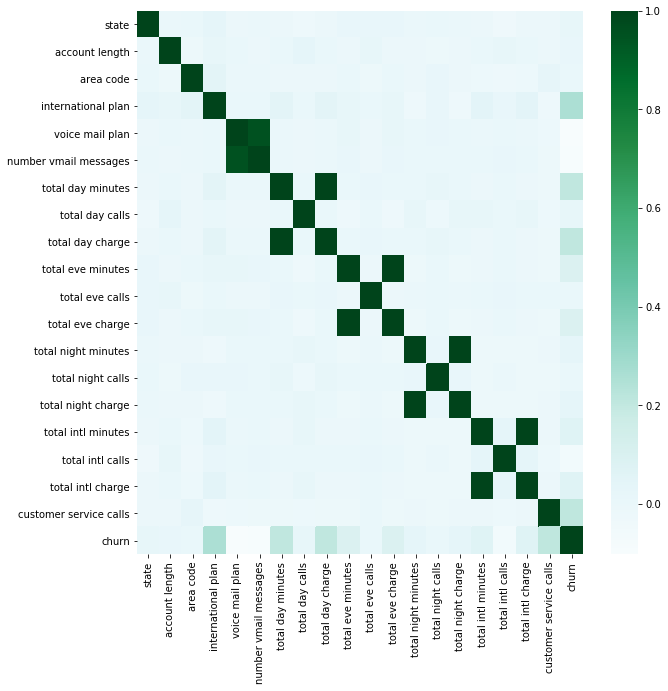

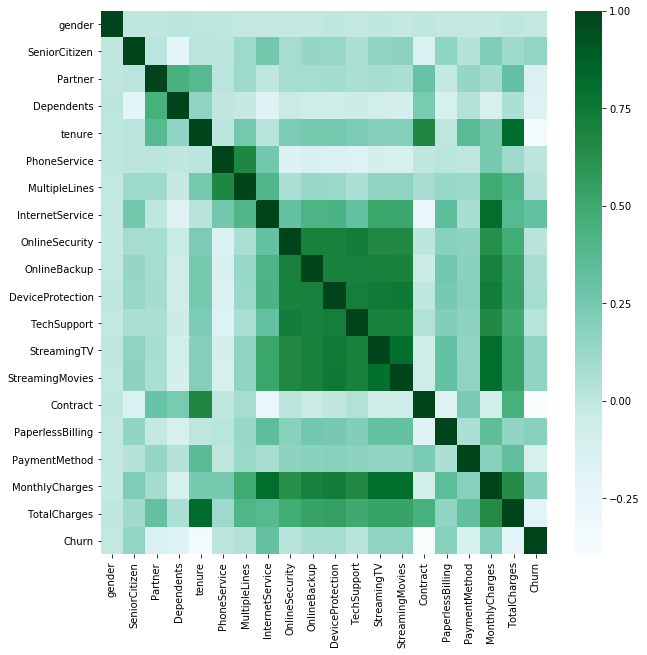

In [26]:
def correlation_plot(df):
    plt.figure(figsize=(10,10)) 
    sns.heatmap(df.corr(), cmap='BuGn')
    plt.show()
    return

correlation_plot(df1)
correlation_plot(df2)

In [28]:
df1.to_pickle("./ds1_trans.pkl")
df2.to_pickle("./ds2_trans.pkl")

# Dimentionality Reduction

In [27]:
df1

state  account length  area code  international plan  \
phone number                                                         
382-4657          0             128        415                   0   
371-7191          2             107        415                   0   
358-1921          4             137        415                   0   
375-9999          2              84        408                   1   
330-6626          6              75        415                   1   
391-8027          8             118        510                   1   
355-9993         10             121        510                   0   
329-9001         12             147        415                   1   
335-4719         14             117        408                   0   
330-8173         16             141        415                   1   
329-6603         18              65        415                   0   
344-9403         20              74        415                   0   
363-1107         22             168        408                   0   
394-8006         24              95        510                   0   
366-9238         22              62        415                   0   
351-7269         26             161        415                   0   
350-8884         28              85        408                   0   
386-2923         30              93        510                   0   
356-2992         32              76        510                   0   
373-2782         34              73        415                   0   
396-5800         36             147        415                   0   
393-7984         38              77        408                   0   
358-1958         40             130        415                   0   
350-2565         42             111        415                   0   
343-4696         32             132        510                   0   
331-3698         44             174        415                   0   
357-3817         46              57        408                   0   
418-6412         24              54        408                   0   
353-2630         12              20        415                   0   
410-7789         48              49        510                   0   
...             ...             ...        ...                 ...   
373-7308         62             114        415                   0   
330-7137         50              71        510                   1   
406-8445         18              58        415                   0   
404-5283          8             106        408                   0   
398-3632          6             172        408                   0   
399-5763         22              45        415                   0   
340-9449         30             100        408                   1   
363-1123         26              94        415                   0   
361-2170         14             128        415                   0   
406-6304         42             181        408                   0   
392-5090         28             127        408                   0   
373-7713         12              89        415                   0   
392-1376         90             149        415                   0   
390-6388         92             103        510                   0   
379-7290         76             163        415                   1   
397-9928          6              52        415                   0   
378-6924         46              89        415                   0   
411-5677         54             122        510                   1   
400-2738         30              60        415                   0   
409-1856         58              62        408                   0   
362-5899         18             117        415                   0   
377-1164         16             159        415                   0   
368-8555          2              78        408                   0   
347-6812          2              96        415                   0   
348-3830         42     

**area code** inconsistent with **state** codes [We keep **area code** as it has less variations less variations]

**voice mail plan** redundant as **number vmail messages** == 0 means the same (roughly)

**number vmail messages** = -1 if **voice mail plan** == 0

* total day minutes   * 0.17 = total day charge
* total eve minutes   * 0.085= total eve charge
* total night minutes * 0.45 =total night charge
* total intl minutes  * 0.27 = total intl charge

Total no of calls at any point of time is independent

**total day minutes**, **total eve minutes**, **total night minutes**, **total intl minutes** redundant

### It is not clear what is meant by 'account length'

In [35]:
account_length_set  = Counter(list(df1['account length']))
account_length_uniq = list(account_length_set.keys())
account_length_freq = list(account_length_set.values())
print(account_length_uniq)
print(account_length_freq)

[128, 107, 137, 84, 75, 118, 121, 147, 117, 141, 65, 74, 168, 95, 62, 161, 85, 93, 76, 73, 77, 130, 111, 132, 174, 57, 54, 20, 49, 142, 172, 12, 72, 36, 78, 136, 149, 98, 135, 34, 160, 64, 59, 119, 97, 52, 60, 10, 96, 87, 81, 68, 125, 116, 38, 40, 43, 113, 126, 150, 138, 162, 90, 50, 82, 144, 46, 70, 55, 106, 94, 155, 80, 104, 99, 120, 108, 122, 157, 103, 63, 112, 41, 193, 61, 92, 131, 163, 91, 127, 110, 140, 83, 145, 56, 151, 139, 6, 115, 146, 185, 148, 32, 25, 179, 67, 19, 170, 164, 51, 208, 53, 105, 66, 86, 35, 88, 123, 45, 100, 215, 22, 33, 114, 24, 101, 143, 48, 71, 167, 89, 199, 166, 158, 196, 209, 16, 39, 173, 129, 44, 79, 31, 124, 37, 159, 194, 154, 21, 133, 224, 58, 11, 109, 102, 165, 18, 30, 176, 47, 190, 152, 26, 69, 186, 171, 28, 153, 169, 13, 27, 3, 42, 189, 156, 134, 243, 23, 1, 205, 200, 5, 9, 178, 181, 182, 217, 177, 210, 29, 180, 2, 17, 7, 212, 232, 192, 195, 197, 225, 184, 191, 201, 15, 183, 202, 8, 175, 4, 188, 204, 221]
[22, 36, 25, 27, 32, 24, 31, 18, 32, 22, 21, 3

Still no insights on account length

In [33]:
df1_copy = df1.copy()

df1_copy.loc[df1_copy['voice mail plan'] == 0, 'number vmail messages'] = -1 
df1_copy.drop(['state', 'voice mail plan', 
               'total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes'], axis=1, inplace = True)
df1_copy

account length  area code  international plan  \
phone number                                                  
382-4657                 128        415                   0   
371-7191                 107        415                   0   
358-1921                 137        415                   0   
375-9999                  84        408                   1   
330-6626                  75        415                   1   
391-8027                 118        510                   1   
355-9993                 121        510                   0   
329-9001                 147        415                   1   
335-4719                 117        408                   0   
330-8173                 141        415                   1   
329-6603                  65        415                   0   
344-9403                  74        415                   0   
363-1107                 168        408                   0   
394-8006                  95        510                   0   
366-9238                  62        415                   0   
351-7269                 161        415                   0   
350-8884                  85        408                   0   
386-2923                  93        510                   0   
356-2992                  76        510                   0   
373-2782                  73        415                   0   
396-5800                 147        415                   0   
393-7984                  77        408                   0   
358-1958                 130        415                   0   
350-2565                 111        415                   0   
343-4696                 132        510                   0   
331-3698                 174        415                   0   
357-3817                  57        408                   0   
418-6412                  54        408                   0   
353-2630                  20        415                   0   
410-7789                  49        510                   0   
...                      ...        ...                 ...   
373-7308                 114        415                   0   
330-7137                  71        510                   1   
406-8445                  58        415                   0   
404-5283                 106        408                   0   
398-3632                 172        408                   0   
399-5763                  45        415                   0   
340-9449                 100        408                   1   
363-1123                  94        415                   0   
361-2170                 128        415                   0   
406-6304                 181        408                   0   
392-5090                 127        408                   0   
373-7713                  89        415                   0   
392-1376                 149        415                   0   
390-6388                 103        510                   0   
379-7290                 163        415                   1   
397-9928                  52        415                   0   
378-6924                  89        415                   0   
411-5677                 122        510                   1   
400-2738                  60        415                   0   
409-1856                  62        408                   0   
362-5899                 117        415                   0   
377-1164                 159        415                   0   
368-8555                  78        408                   0   
347-6812                  96        415                   0   
348-3830                  79        415                   0   
414-4276                 192        415                   0   
370-3271                  68        415                   0   
328-8230                  28        510                   0   
364-6381                 184        510                   1   
400-4344                  74        415                   0   

              number vmail messages  total d

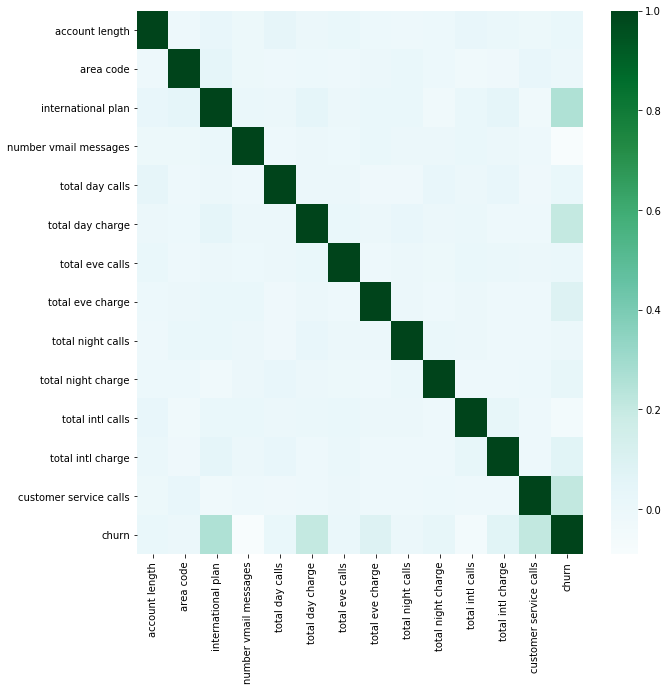

In [37]:
correlation_plot(df1_copy)

In [36]:
df2

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
customerID                                                                     
7590-VHVEG       0              0        1           0       1             0   
5575-GNVDE       1              0        0           0      34             1   
3668-QPYBK       1              0        0           0       2             1   
7795-CFOCW       1              0        0           0      45             0   
9237-HQITU       0              0        0           0       2             1   
9305-CDSKC       0              0        0           0       8             1   
1452-KIOVK       1              0        0           1      22             1   
6713-OKOMC       0              0        0           0      10             0   
7892-POOKP       0              0        1           0      28             1   
6388-TABGU       1              0        0           1      62             1   
9763-GRSKD       1              0        1           1      13             1   
7469-LKBCI       1              0        0           0      16             1   
8091-TTVAX       1              0        1           0      58             1   
0280-XJGEX       1              0        0           0      49             1   
5129-JLPIS       1              0        0           0      25             1   
3655-SNQYZ       0              0        1           1      69             1   
8191-XWSZG       0              0        0           0      52             1   
9959-WOFKT       1              0        0           1      71             1   
4190-MFLUW       0              0        1           1      10             1   
4183-MYFRB       0              0        0           0      21             1   
8779-QRDMV       1              1        0           0       1             0   
1680-VDCWW       1              0        1           0      12             1   
1066-JKSGK       1              0        0           0       1             1   
3638-WEABW       0              0        1           0      58             1   
6322-HRPFA       1              0        1           1      49             1   
6865-JZNKO       0              0        0           0      30             1   
6467-CHFZW       1              0        1           1      47             1   
8665-UTDHZ       1              0        1           1       1             0   
5248-YGIJN       1              0        1           0      72             1   
8773-HHUOZ       0              0        0           1      17             1   
...            ...            ...      ...         ...     ...           ...   
1685-BQULA       0              0        0           0      40             1   
9053-EJUNL       1              0        0           0      41             1   
0666-UXTJO       1              1        1           0      34             1   
1471-GIQKQ       0              0        0           0       1             1   
4807-IZYOZ       0              0        0           0      51             1   
1122-JWTJW       1              0        1           1       1             1   
9710-NJERN       0              0        0           0      39             1   
9837-FWLCH       1              0        1           1      12             1   
1699-HPSBG       1              0        0           0      12             1   
7203-OYKCT       1              0        0           0      72             1   
1035-IPQPU       0              1        1           0      63             1   
7398-LXGYX       1              0        1           0      44             1   
2823-LKABH       0              0        0           0      18             1   
8775-CEBBJ       0              0        0           0       9             1   
0550-DCXLH       1              0        0           0      13             1   
9281-CEDRU       0              0        1           0      68             1   
2235-DWLJU       0              1        0           0       6             0   
0871-OPBXW  

**PaperlessBilling** is redundant as **PaymentMethod** values already indicate paperless-billing

**TotalCharges** = **MonthlyCharges** X **tenure** || Either can be dropped lets say **TotalCharges** is dropped

The following attributes have high correlation and can be mearged into another
* **OnlineSecurity**
* **OnlineBackup**
* **DeviceProtection**
* **TechSupport**
* **StreamingTV**
* **StreamingMovies**

    No internet service value is already evident from InternetService as No

**PhoneService** & **MultipleLines** can be combined

**NoOfPhoneLines** = 0(**PhoneService** == No) 1(**PhoneService** == Yes && **MultipleLines** == No) 1+

[OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies] & [PhoneService,MultipleLines]

**InternetService** has correlation with both the groups and hence act as a bridge 

**Partner	Dependents**

**PartnerOrDependents** = 0 (No+No) 1 (Yes+No / No+Yes) 5(Yes+Yes)

In [42]:
df2_copy = df2.copy()

df2_copy['Partner'] = df2_copy['Partner'] + df2_copy['Dependents']
df2_copy.loc[df2_copy['Partner'] == 2 , 'Partner'] = 5

df2_copy['PhoneService'] = df2_copy['PhoneService'] + df2_copy['MultipleLines']
df2_copy.loc[df2_copy['PhoneService'] == -10 , 'PhoneService'] = -5
df2_copy.loc[df2_copy['PhoneService'] == 11 , 'PhoneService'] = 5

df2_copy['OnlineSecurity'] = df2_copy['OnlineSecurity'] + df2_copy['OnlineBackup'] + df2_copy['DeviceProtection'] + df2_copy['TechSupport'] + df2_copy['StreamingTV'] + df2_copy['StreamingMovies']

df2_copy.rename(columns={'Partner': 'PartnerOrDependents', 'PhoneService': 'NoOfPhoneLines', 'OnlineSecurity': 'OtherServices'}
               , inplace = True)
df2_copy.drop(['PaperlessBilling', 'TotalCharges', 'Dependents', 'MultipleLines',
              'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'], axis=1, inplace = True)
df2_copy

gender  SeniorCitizen  PartnerOrDependents  tenure  \
customerID                                                       
7590-VHVEG       0              0                    1       1   
5575-GNVDE       1              0                    0      34   
3668-QPYBK       1              0                    0       2   
7795-CFOCW       1              0                    0      45   
9237-HQITU       0              0                    0       2   
9305-CDSKC       0              0                    0       8   
1452-KIOVK       1              0                    1      22   
6713-OKOMC       0              0                    0      10   
7892-POOKP       0              0                    1      28   
6388-TABGU       1              0                    1      62   
9763-GRSKD       1              0                    5      13   
7469-LKBCI       1              0                    0      16   
8091-TTVAX       1              0                    1      58   
0280-XJGEX       1              0                    0      49   
5129-JLPIS       1              0                    0      25   
3655-SNQYZ       0              0                    5      69   
8191-XWSZG       0              0                    0      52   
9959-WOFKT       1              0                    1      71   
4190-MFLUW       0              0                    5      10   
4183-MYFRB       0              0                    0      21   
8779-QRDMV       1              1                    0       1   
1680-VDCWW       1              0                    1      12   
1066-JKSGK       1              0                    0       1   
3638-WEABW       0              0                    1      58   
6322-HRPFA       1              0                    5      49   
6865-JZNKO       0              0                    0      30   
6467-CHFZW       1              0                    5      47   
8665-UTDHZ       1              0                    5       1   
5248-YGIJN       1              0                    1      72   
8773-HHUOZ       0              0                    1      17   
...            ...            ...                  ...     ...   
1685-BQULA       0              0                    0      40   
9053-EJUNL       1              0                    0      41   
0666-UXTJO       1              1                    1      34   
1471-GIQKQ       0              0                    0       1   
4807-IZYOZ       0              0                    0      51   
1122-JWTJW       1              0                    5       1   
9710-NJERN       0              0                    0      39   
9837-FWLCH       1              0                    5      12   
1699-HPSBG       1              0                    0      12   
7203-OYKCT       1              0                    0      72   
1035-IPQPU       0              1                    1      63   
7398-LXGYX       1              0                    1      44   
2823-LKABH       0              0                    0      18   
8775-CEBBJ       0              0                    0       9   
0550-DCXLH       1              0                    0      13   
9281-CEDRU       0              0                    1      68   
2235-DWLJU       0              1                    0       6   
0871-OPBXW       0              0                    0       2   
3605-JISKB       1              1                    1      55   
6894-LFHLY       1              1                    0       1   
9767-FFLEM       1              0                    0      38   
0639-TSIQW       0              0                    0      67   
8456-QDAVC       1              0                    0      19   
7750-EYXWZ       0              0                    0      12   
2569-WGERO       0              0                    0      72   
6840-RESVB       1              0                    5      24   
2234-XADUH       0              0                    5      72   
4801-JZAZL       0              0                   

In [43]:
correlation_plot(df2_copy)

**Interesting observations in dataset 2**
* Monthly charges is depending on **NoOfPhoneLines**, **InternetServices** & **OtherServices**
* Contact has about 60% correlation with tenure

### Saving reduced dataset

In [38]:
df1_copy.to_pickle("./ds1_reduced.pkl")

In [44]:
df2_copy.to_pickle("./ds2_reduced.pkl")